### NON-LINEAR RELATIONSHIPS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

#### DECISION TREE REGRESSION MODEL

Tuning between Hyperparameter.

+ Using max_depth = 2,3,5,10 etc
+ Here the model is overfitting from more than 3.
+ So the best model is with 2

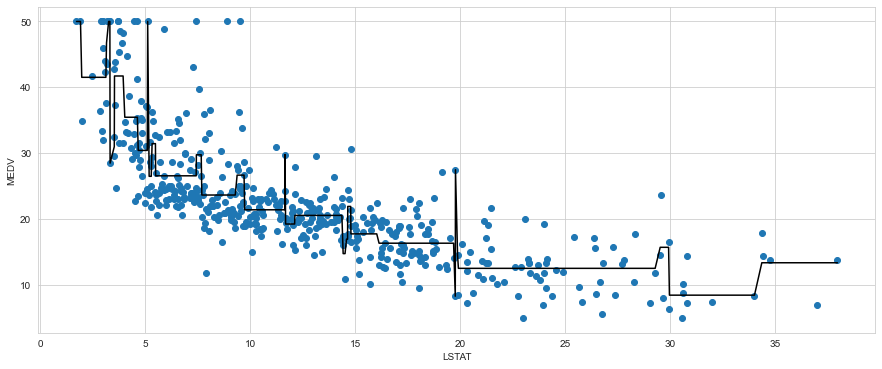

In [23]:
## fetch the data
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()


## selecting the X feature
X = df[["LSTAT"]].values
#print(type(X))
## selecting the target feature or label.
y = boston_data.target

## building a Decision Tree Model
## using the max_depth = 5
from sklearn.tree import DecisionTreeRegressor
## initiate the model
tree_model = DecisionTreeRegressor(max_depth = 5)
## fit the model using X and y
tree_model.fit(X, y)

## sort Index 
#X_array = np.array(X)
sort_idx = X.flatten().argsort()

## plotting the situation
plt.figure(figsize=(15,6))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree_model.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

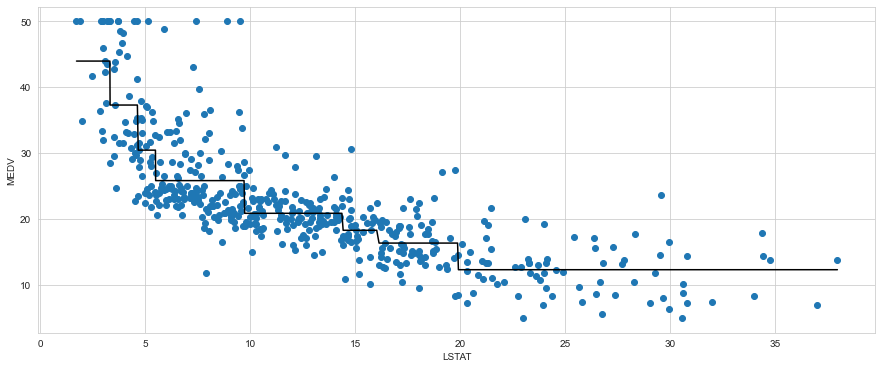

In [24]:
## using the max_depth = 3
from sklearn.tree import DecisionTreeRegressor
## initiate the model
tree_model = DecisionTreeRegressor(max_depth = 3)
## fit the model using X and y
tree_model.fit(X, y)

## sort Index 
#X_array = np.array(X)
sort_idx = X.flatten().argsort()

## plotting the situation
plt.figure(figsize=(15,6))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree_model.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

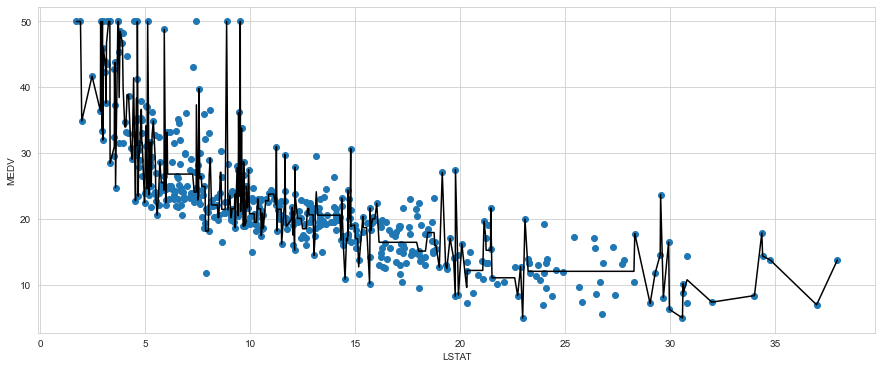

In [25]:
## using the max_depth = 10 and 2
from sklearn.tree import DecisionTreeRegressor
## initiate the model
tree_model = DecisionTreeRegressor(max_depth = 10)
## fit the model using X and y
tree_model.fit(X, y)

## sort Index 
#X_array = np.array(X)
sort_idx = X.flatten().argsort()

## plotting the situation
plt.figure(figsize=(15,6))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree_model.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

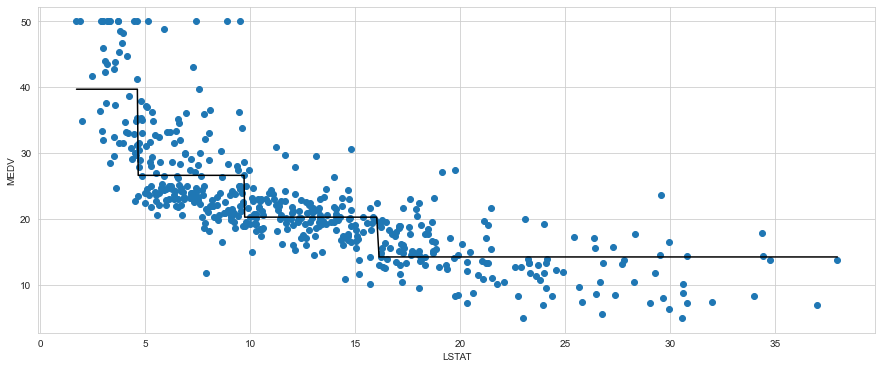

In [26]:
## max_depth = 2
from sklearn.tree import DecisionTreeRegressor
## initiate the model
tree_model = DecisionTreeRegressor(max_depth = 2)
## fit the model using X and y
tree_model.fit(X, y)

## sort Index 
#X_array = np.array(X)
sort_idx = X.flatten().argsort()

## plotting the situation
plt.figure(figsize=(15,6))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree_model.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

#### RANDOM FOREST REGRESSION MODEL

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
## split the dataset to training set and test set.
X = df.values
#print(type(X))
y = boston_data.target
#print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

## define the model
forest_model = RandomForestRegressor(n_estimators=500, criterion="mse", random_state=42, n_jobs = 2)
## fit the model
forest_model.fit(X_train,y_train)
## predict the model
y_train_predict = forest_model.predict(X_train)
y_test_predict = forest_model.predict(X_test)
print("Mean Squared Error on Training Set :-", mean_squared_error(y_train, y_train_predict))
print("Mean Squared Error on Testing Set :-", mean_squared_error(y_test, y_test_predict))
print("R2 on Training Set :-", r2_score(y_train, y_train_predict))
print("R2 on Testing Set :-", r2_score(y_test, y_test_predict))
print("Cross Val Score on Training set :-", cross_val_score(forest_model, y_train.reshape(-1,1), y_train_predict, cv = 10).mean())
print("Cross Val Score on Testing set :-", cross_val_score(forest_model, y_test.reshape(-1,1), y_test_predict, cv = 10).mean())

Mean Squared Error on Training Set :- 1.8752672945762605
Mean Squared Error on Testing Set :- 9.325634331578941
R2 on Training Set :- 0.9786650587106662
R2 on Testing Set :- 0.8748456997993717
Cross Val Score on Training set :- 0.9711318612360008
Cross Val Score on Testing set :- 0.824528699919355


#### ADABOOST REGRESSION MODEL

In [64]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## initiate the model
adaboost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=500, random_state=42)
## fit the model using X_train and y_train
adaboost.fit(X_train, y_train)
## prediction using training set and test set.
y_train_predict = adaboost.predict(X_train)
y_test_predict = adaboost.predict(X_test)

## print the results or scores
print("Mean Squared Error on Training Set :-", mean_squared_error(y_train, y_train_predict))
print("Mean Squared Error on Testing Set :-", mean_squared_error(y_test, y_test_predict))
print("R2 on Training Set :-", r2_score(y_train, y_train_predict))
print("R2 on Testing Set :-", r2_score(y_test, y_test_predict))
print("Cross Val Score on Training set :-", cross_val_score(forest_model, y_train.reshape(-1,1), y_train_predict, cv = 10).mean())
print("Cross Val Score on Testing set :-", cross_val_score(forest_model, y_test.reshape(-1,1), y_test_predict, cv = 10).mean())

Mean Squared Error on Training Set :- 0.15323290857115954
Mean Squared Error on Testing Set :- 11.011404335112886
R2 on Training Set :- 0.9982566671335789
R2 on Testing Set :- 0.8522218913172971
Cross Val Score on Training set :- 0.9976875831609716
Cross Val Score on Testing set :- 0.7316153406330905


### FEATURE IMPORTANCE USING THE MODELS

The Feature Importance Array :-- [0.0313577  0.00187561 0.01007038 0.00290099 0.01878477 0.22132365
 0.02007813 0.11151412 0.00581728 0.01434539 0.03047554 0.02122896
 0.51022747]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
          feature
LSTAT    0.510227
RM       0.221324
DIS      0.111514
CRIM     0.031358
PTRATIO  0.030476
B        0.021229
AGE      0.020078
NOX      0.018785
TAX      0.014345
INDUS    0.010070
RAD      0.005817
CHAS     0.002901
ZN       0.001876


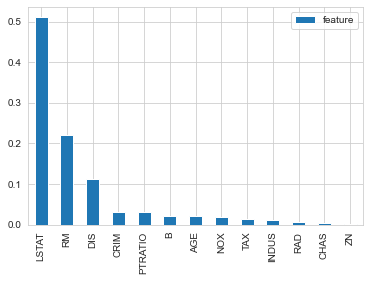

In [93]:
## to get the best features with respect to the ada model
print("The Feature Importance Array :--",adaboost.feature_importances_)
print(df.columns)
result = pd.DataFrame(adaboost.feature_importances_, df.columns)
result.columns = ["feature"]
print(result.sort_values(by = "feature", ascending=False))
## plotting the result
## barplot
result.sort_values(by='feature', ascending=False).plot(kind='bar');

The Feature Importance Array :-- [0.03204822 0.00160483 0.00700703 0.00125804 0.01475089 0.40389139
 0.01410918 0.06287534 0.00515063 0.01197446 0.01821116 0.01241787
 0.41470096]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
          feature
LSTAT    0.414701
RM       0.403891
DIS      0.062875
CRIM     0.032048
PTRATIO  0.018211
NOX      0.014751
AGE      0.014109
B        0.012418
TAX      0.011974
INDUS    0.007007
RAD      0.005151
ZN       0.001605
CHAS     0.001258


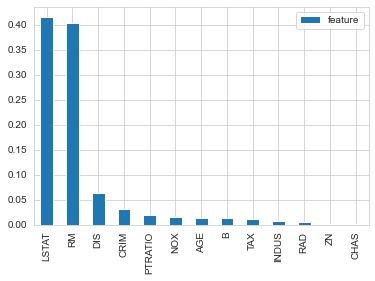

In [95]:
## to get the best features with respect to the ranom forest
print("The Feature Importance Array :--",forest_model.feature_importances_)
print(df.columns)
result = pd.DataFrame(forest_model.feature_importances_, df.columns)
result.columns = ["feature"]
print(result.sort_values(by = "feature", ascending=False))
## plotting the result
## barplot
result.sort_values(by='feature', ascending=False).plot(kind='bar');

In [103]:
# ## according to tree model
# ## to get the best features with respect to the ranom forest
# print("The Feature Importance Array :--",tree_model.feature_importances_)
# print(df.columns)
# result = pd.DataFrame(tree_model.feature_importances_, df.columns)
# result.columns = ["feature"]
# print(result.sort_values(by = "feature", ascending=False))
# ## plotting the result
# ## barplot
# result.sort_values(by='feature', ascending=False).plot(kind='bar');

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

## split the ddata
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


## define the regressor
tree_model = DecisionTreeRegressor(max_depth=5)
## fit the model
tree_model.fit(X_train, y_train)
## predict the model using traininig set and test set
y_train_predict = tree_model.predict(X_train)
y_test_predict = tree_model.predict(X_test)

##print the scores
print("Mean Squared Error on Training Set :-", mean_squared_error(y_train, y_train_predict))
print("Mean Squared Error on Testing Set :-", mean_squared_error(y_test, y_test_predict))
print("R2 on Training Set :-", r2_score(y_train, y_train_predict))
print("R2 on Testing Set :-", r2_score(y_test, y_test_predict))
print("Cross Val Score on Training set :-", cross_val_score(forest_model, y_train.reshape(-1,1), y_train_predict, cv = 10).mean())
print("Cross Val Score on Testing set :-", cross_val_score(forest_model, y_test.reshape(-1,1), y_test_predict, cv = 10).mean())

## checking tfpr the 

The Feature Importance Array :-- [1.]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


ValueError: Shape of passed values is (1, 1), indices imply (13, 1)